# Problem - 1

Your Friend has developed the Product and he wants to establish the product startup and he is searching for a perfect location where getting the investment has a high chance. But due to its financial restriction, he can choose only between three locations -  Bangalore, Mumbai, and NCR. As a friend, you want to help your friend deciding the location. NCR include Gurgaon, Noida and New Delhi. Find the location where the most number of funding is done. That means, find the location where startups has received funding maximum number of times. Plot the bar graph between location and number of funding. Take city name "Delhi" as "New Delhi". Check the case-sensitiveness of cities also. That means, at some place instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore". For few startups multiple locations are given, one Indian and one Foreign. Consider the startup if any one of the city lies in given locations.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

df = pd.read_csv('startup_funding.csv',encoding='utf-8')
df

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN
...,...,...,...,...,...,...,...,...,...,...
2367,2367,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"4,500,000",NaN
2368,2368,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"825,000",Govt backed VC Fund
2369,2369,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"1,500,000",NaN
2370,2370,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


City where most number of funding is done among Bangalore, Mumbai and NCR is ' Bangalore '.


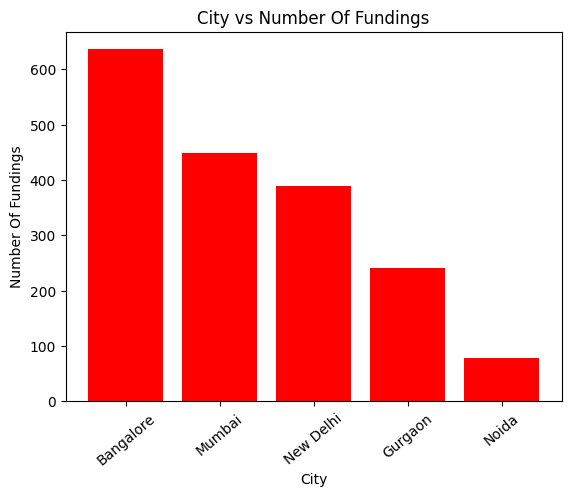

,Name Of City,Number Of Fundings
0,Bangalore,636
1,Mumbai,449
2,New Delhi,389
3,Gurgaon,241
4,Noida,79


In [4]:
test1 = df.copy()

#filtering na
test1.dropna(inplace = True, subset = ['CityLocation'])
test1.reset_index(drop = True, inplace = True)

#function to split indian cities from string
def ind_city(city):
    return city.split('/')[0].strip()

#replacing the wrong written city
test1['CityLocation'].replace("bangalore", "Bangalore", inplace = True)
test1['CityLocation'].replace("Delhi", "New Delhi", inplace = True)
test1['CityLocation'].replace("SFO / Bangalor", "Bangalore", inplace = True)
test1['CityLocation'].replace("Seattle / Bangalore", "Bangalore", inplace = True)

#filtering city
test1['CityLocation'] = test1['CityLocation'].apply(ind_city)

#filtering the cities on the basis of given conditions
test1 = test1[(test1['CityLocation'] == "Bangalore") | (test1['CityLocation'] == "Mumbai") | (test1['CityLocation'] == "Gurgaon") | (test1['CityLocation'] == "Noida") | (test1['CityLocation'] == "New Delhi")]

#extracting the cities and their counts
temp = test1['CityLocation'].value_counts()
city = temp.index
No_Of_Funding = temp.values

#printing the city where most number of funding is Done
print("City where most number of funding is done among Bangalore, Mumbai and NCR is '",city[0],"'.")

#bar Graph
plt.bar(city, No_Of_Funding, color = ['Red'], width = 0.8)
plt.xlabel("City")
plt.xticks(rotation = 40)
plt.ylabel("Number Of Fundings")
plt.title("City vs Number Of Fundings")
plt.show()
li = list(zip(city, No_Of_Funding))

#build pandas dataframe for the city and corresponding investments
freq = pd.DataFrame(li, columns = ["Name Of City", "Number Of Fundings"])
freq

2 Problem - 2

Even after trying for so many times, your friend’s startup could not find the investment. So you decided to take this matter in your hand and try to find the list of investors who probably can invest in your friend’s startup. Your list will increase the chance of your friend startup getting some initial investment by contacting these investors. Find the top 5 investors who have invested maximum number of times (consider repeat investments in one company also). In a startup, multiple investors might have invested. So consider each investor for that startup. Ignore undisclosed investors.

List Of Top 5 Investors who Invested most number of times :
1. Sequoia Capital
2. Accel Partners
3. Kalaari Capital
4. SAIF Partners
5. Indian Angel Network


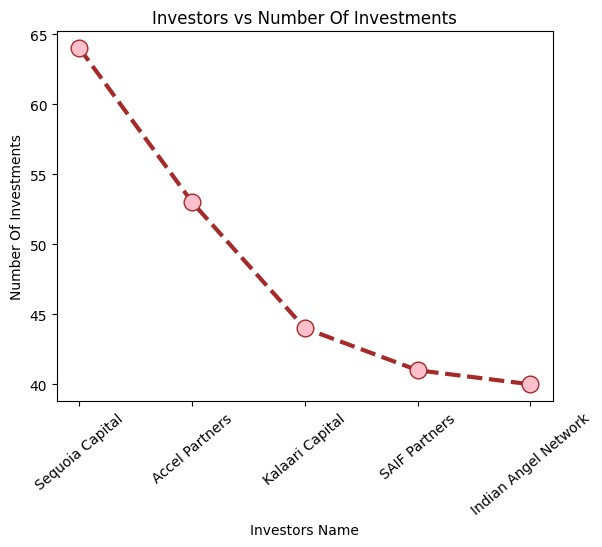

,Name Of Investors,Total Number Of Investments
0,Sequoia Capital,[64]
1,Accel Partners,[53]
2,Kalaari Capital,[44]
3,SAIF Partners,[41]
4,Indian Angel Network,[40]


In [5]:
test2 = df.copy()

#correcting the spelling in investors name ignoring undisclosed investors
test2['InvestorsName'].replace("Undisclosed investors", "Undisclosed Investors", inplace = True)
test2['InvestorsName'].replace("Undisclosed Investors","",inplace = True)

#filter na
test2.dropna(inplace = True, subset=['InvestorsName'])
test2.reset_index(drop = True, inplace = True)

#function to fill dictionary on the basis of investors name
def build_dict(array):
    d = {}
    #d holds investors name as key and the number of investments as value
    for i in array:
        if ',' not in i and i != "":
            d[i] = d.get(i, 0) + 1
        else:
            #splitting the Investors name list
            string = i.strip().split(',')
            for j in string:
                if j != "":
                    d[j.strip()] = d.get(j.strip(), 0) + 1

    return d


dictionary = build_dict(test2['InvestorsName'])
#build pandas dataframe of investors name and its number of investments
invest = pd.DataFrame(list(dictionary.values()), list(dictionary.keys()))

#sort the values in descending order
invest = invest.sort_values(by = [0], ascending = False)

x = []
y = []

#we have to just find top 5 investors who invest maximum number of times
for i in range(5):
    x.append(invest.index[i])
    y.append(invest.values[i])

#printing the top investors
print("List Of Top 5 Investors who Invested most number of times :")
i = 0
for ele in x:
    print(i+1,end = "")
    print(".", end = " ")
    print(ele)
    i += 1


#plot the plot line
plt.plot(x, y, color='brown', linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='pink', markersize=12)
plt.xlabel("Investors Name")
plt.xticks(rotation=40)
plt.ylabel("Number Of Investments")
plt.title("Investors vs Number Of Investments")
plt.show()


#pandas frame for Investors name and corresponding Number of Investments made by them
li = list(zip(x,y))
investor_data = pd.DataFrame(li, columns = ["Name Of Investors", "Total Number Of Investments"])
investor_data

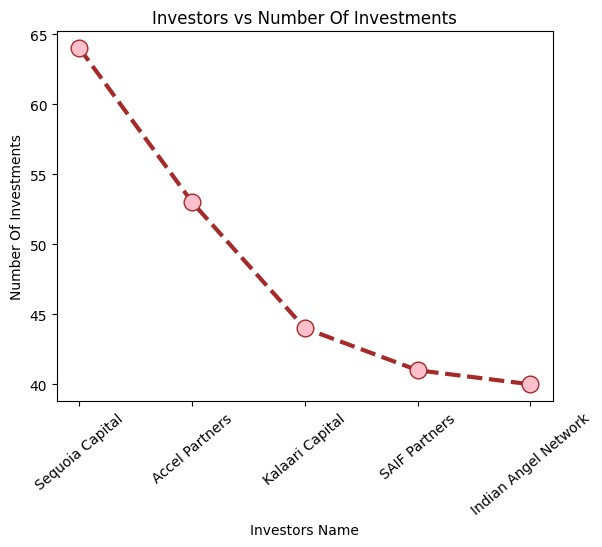

,Name Of Investors,Total Number Of Investments
0,Sequoia Capital,[64]
1,Accel Partners,[53]
2,Kalaari Capital,[44]
3,SAIF Partners,[41]
4,Indian Angel Network,[40]


In [6]:
#plot the plot line
plt.plot(x, y, color='brown', linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='pink', markersize=12)
plt.xlabel("Investors Name")
plt.xticks(rotation=40)
plt.ylabel("Number Of Investments")
plt.title("Investors vs Number Of Investments")
plt.show()


#pandas frame for Investors name and corresponding Number of Investments made by them
li = list(zip(x,y))
investor_data = pd.DataFrame(li, columns = ["Name Of Investors", "Total Number Of Investments"])
investor_data

# Question 3

After re-analysing the dataset you found out that some investors have invested in the same startup at different number of funding rounds. So before finalising the previous list, you want to improvise it by finding the top 5 investors who have invested in different number of startups. This list will be more helpful than your previous list in finding the investment for your friend startup. Find the top 5 investors who have invested maximum number of times in different companies. That means, if one investor has invested multiple times in one startup, count one for that company. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

In [7]:
test3 = df.copy()

#correcting the spelling in investors name ignoring undisclosed investors
test3['InvestorsName'].replace("Undisclosed investors", "Undisclosed Investors", inplace = True)
test3['InvestorsName'].replace("Undisclosed Investors","",inplace = True)

#correcting major startup names
test3['StartupName'].replace("Ola Cabs", "Ola", inplace = True)
test3['StartupName'].replace("OyoRooms", "Oyo", inplace = True)
test3['StartupName'].replace("Oyorooms", "Oyo", inplace = True)
test3['StartupName'].replace("OYO Rooms", "Oyo", inplace = True)
test3['StartupName'].replace("Olacabs", "Ola", inplace = True)
test3['StartupName'].replace("Flipkart.com", "Flipkart", inplace = True)
test3['StartupName'].replace("Oyo Rooms", "Oyo", inplace = True)
test3['StartupName'].replace("Paytm Marketplace", "Paytm", inplace = True)

#filtering the na
test3.dropna(inplace = True, subset = ["InvestorsName", "StartupName"])
test3.reset_index(drop = True, inplace = True)

In [8]:
#function to create dictionary of investor name making investment to different startups
def Create(startup_name, Investor_name):
    cnt = {}
    #cnt holds investors name as key and the number of investments as value
    name_startup = {}
    #name_startup holds the investors name as key and list of different companies in which it invests as value
    n = len(Investor_name)
    for idx in range(n):
        i = Investor_name[idx].strip()
        name = startup_name[idx].strip()
        if ',' not in i and i != "":
            if name_startup.get(i) is None: #no startup is still funded by this investor
                cnt[i] = 1
                li = []
                li.append(name)
                name_startup[i] = li
            else:
                li = name_startup[i]
                if name not in li:             #checking the given startup has been invested before or not
                    cnt[i] = cnt.get(i, 0) + 1
                    li.append(name)
                    name_startup[i]

        else:
            #splitting the Investors name list
            string = i.strip().split(',')
            for j in string:
                k = j.strip()
                if k != "":
                    if name_startup.get(k) is None:  #no startup is still funded by this investor
                        cnt[k] = 1
                        li = []
                        li.append(name)
                        name_startup[k] = li
                    else:
                        li = name_startup[k]
                        if name not in li:         #checking the given startup has been invested before or not
                            cnt[k] = cnt.get(k, 0) + 1
                            li.append(name)
                            name_startup[k] = li

    return cnt#function to create dictionary of investor name making investment to different startups
def Create(startup_name, Investor_name):
    cnt = {}
    #cnt holds investors name as key and the number of investments as value
    name_startup = {}
    #name_startup holds the investors name as key and list of different companies in which it invests as value
    n = len(Investor_name)
    for idx in range(n):
        i = Investor_name[idx].strip()
        name = startup_name[idx].strip()
        if ',' not in i and i != "":
            if name_startup.get(i) is None: #no startup is still funded by this investor
                cnt[i] = 1
                li = []
                li.append(name)
                name_startup[i] = li
            else:
                li = name_startup[i]
                if name not in li:             #checking the given startup has been invested before or not
                    cnt[i] = cnt.get(i, 0) + 1
                    li.append(name)
                    name_startup[i]

        else:
            #splitting the Investors name list
            string = i.strip().split(',')
            for j in string:
                k = j.strip()
                if k != "":
                    if name_startup.get(k) is None:  #no startup is still funded by this investor
                        cnt[k] = 1
                        li = []
                        li.append(name)
                        name_startup[k] = li
                    else:
                        li = name_startup[k]
                        if name not in li:         #checking the given startup has been invested before or not
                            cnt[k] = cnt.get(k, 0) + 1
                            li.append(name)
                            name_startup[k] = li

    return cnt

In [9]:
#making dictionary
dictionary = Create(test3['StartupName'], test3['InvestorsName'])

#build pandas dataframe
diff_invest = pd.DataFrame(list(dictionary.values()), list(dictionary.keys()))

#sort in descending order on the basis of values
diff_invest = diff_invest.sort_values(by = [0], ascending = False)

x = []
y = []

#we have to just find top 5 investors who invest maximum number of times in different startups
for i in range(5):
    x.append(diff_invest.index[i])
    y.append(diff_invest.values[i][0])


#printing the top investors who invested who invested most number of times in different startups
print("List Of Top 5 Investors who Invested most number of times :")
i = 0
for ele in x:
    print(i+1,end = "")
    print(".", end = " ")
    print(ele)
    i += 1

List Of Top 5 Investors who Invested most number of times :
1. Sequoia Capital
2. Accel Partners
3. Kalaari Capital
4. Indian Angel Network
5. Blume Ventures


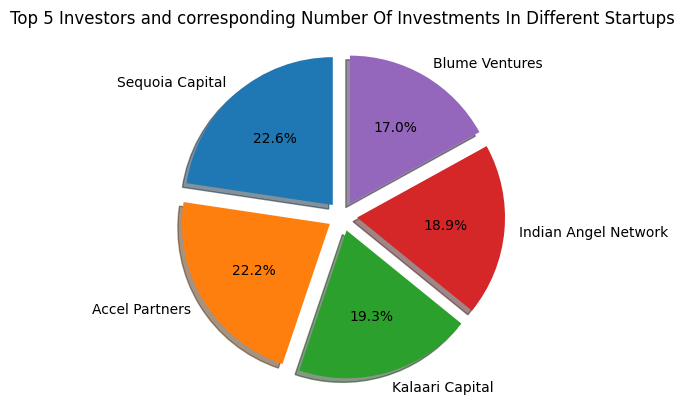

,Name Of Investors,Total Number Of Investments
0,Sequoia Capital,48
1,Accel Partners,47
2,Kalaari Capital,41
3,Indian Angel Network,40
4,Blume Ventures,36


In [10]:
#plot
plt.pie(y, labels = x,startangle=90, shadow = True, explode = (0.1, 0.1, 0.1, 0.1,0.1), autopct = "%.1f%%")
plt.grid()
plt.xticks(rotation=40)
plt.title("Top 5 Investors and corresponding Number Of Investments In Different Startups")
plt.show()

#pandas frame for Investors name and corresponding Number of Investments made by them in different startups
li = list(zip(x,y))
investor_data = pd.DataFrame(li, columns = ["Name Of Investors", "Total Number Of Investments"])
investor_data

# Problem 4

Even after putting so much effort in finding the probable investors, it didn't turn out to be helpful for your friend. So you went to your investor friend to understand the situation better and your investor friend explained to you about the different Investment Types and their features. This new information will be helpful in finding the right investor. Since your friend startup is at an early stage startup, the best-suited investment type would be - Seed Funding and Crowdfunding. Find the top 5 investors who have invested in a different number of startups and their investment type is Crowdfunding or Seed Funding. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

In [11]:
test4 = df.copy()

#correcting the spelling in investors name as ignoring the undisclosed investors
test4['InvestorsName'].replace("Undisclosed investors", "Undisclosed Investors", inplace = True)
test4['InvestorsName'].replace("Undisclosed Investors", "", inplace = True)

#correcting major startup names
test4['StartupName'].replace("Ola Cabs", "Ola", inplace = True)
test4['StartupName'].replace("OyoRooms", "Oyo", inplace = True)
test4['StartupName'].replace("Oyorooms", "Oyo", inplace = True)
test4['StartupName'].replace("OYO Rooms", "Oyo", inplace = True)
test4['StartupName'].replace("Olacabs", "Ola", inplace = True)
test4['StartupName'].replace("Flipkart.com", "Flipkart", inplace = True)
test4['StartupName'].replace("Oyo Rooms", "Oyo", inplace = True)
test4['StartupName'].replace("Paytm Marketplace", "Paytm", inplace = True)

#correcting spelling of investment type
test4['InvestmentType'].replace("PrivateEquity","Private Equity", inplace = True)
test4['InvestmentType'].replace("SeedFunding","Seed Funding", inplace = True)
test4['InvestmentType'].replace("Crowd funding","Crowd Funding", inplace = True)

#filter na
test4.dropna(inplace = True, subset = ["InvestorsName", "StartupName", "InvestmentType"])
test4.reset_index(inplace = True, drop = True)

In [12]:
#function to create dictionary of investor name making investment to different startups and Investment type is either Seed funding or Crowd funding
def Create(startup_name, Investor_name, Invest_type, Investment_type):
    cnt = {}
    #cnt holds investors name as key and the number of investments as value
    name_startup = {}
    #name_startup holds the investors name as key and list of different companies in which it invests as value
    n = len(Investor_name)
    for idx in range(n):
        type_of_invest = Invest_type[idx].strip()
        if type_of_invest not in Investment_type: #if investement type is either seed or crowd then we will look into the startup name or investors name
            continue
        i = Investor_name[idx].strip()
        name = startup_name[idx].strip()
        if ',' not in i and i != "":
            if name_startup.get(i) is None:    #no startup is still funded by this investor till now
                cnt[i] = 1
                li = []
                li.append(name)
                name_startup[i] = li
            else:
                li = name_startup[i]
                if name not in li:             #checking the given startup has been invested before or not
                    cnt[i] = cnt.get(i, 0) + 1
                    li.append(name)
                    name_startup[i]
        else:
            string = i.strip().split(',')
            for j in string:
                k = j.strip()
                if k != "":
                    if name_startup.get(k) is None:    #no startup is still funded by this investor till now
                        cnt[k] = 1
                        li = []
                        li.append(name)
                        name_startup[k] = li
                    else:
                        li = name_startup[k]
                        if name not in li:            #checking the given startup has been invested before or not
                            cnt[k] = cnt.get(k, 0) + 1
                            li.append(name)
                            name_startup[k] = li

    return cnt

In [13]:
#making dictionary to keep record of every investor
dictionary = Create(test4['StartupName'], test4['InvestorsName'], test4['InvestmentType'], ["Crowd Funding", "Seed Funding"])

#build pandas dataframe
diff_invest_type = pd.DataFrame(list(dictionary.values()), list(dictionary.keys()))

#sort in descending order on the basis of values
diff_invest_type = diff_invest_type.sort_values(by = [0], ascending = False)

x = []
y = []
#we have to just find top 5 Investors
for i in range(5):
    x.append(diff_invest_type.index[i])
    y.append(diff_invest_type.values[i][0])

#printing the top investors who invested who invested most number of times in different startups and Investment type is either Seed funding or Crowd funding
print("List Of Top 5 Investors who Invested most number of times of type Seed funding or Crowd funding :")
i = 0
for ele in x:
    print(i+1,end = "")
    print(".", end = " ")
    print(ele)
    i += 1

List Of Top 5 Investors who Invested most number of times of type Seed funding or Crowd funding :
1. Indian Angel Network
2. Rajan Anandan
3. LetsVenture
4. Anupam Mittal
5. Group of Angel Investors


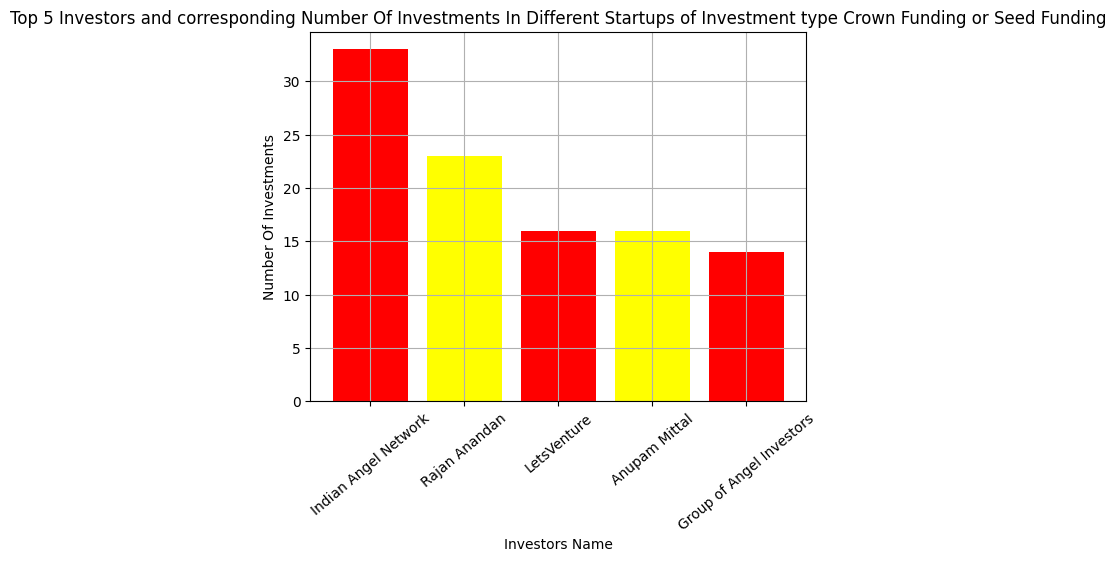

,Name Of Investors,Total Number Of Investments of type Seed funding or Crowd funding
0,Indian Angel Network,33
1,Rajan Anandan,23
2,LetsVenture,16
3,Anupam Mittal,16
4,Group of Angel Investors,14


In [14]:
#plot
plt.bar( x, y, color = ['red', 'yellow'])
plt.grid()
plt.xlabel("Investors Name")
plt.ylabel("Number Of Investments")
plt.xticks(rotation=40)
plt.title("Top 5 Investors and corresponding Number Of Investments In Different Startups of Investment type Crown Funding or Seed Funding")
plt.show()

#pandas frame for Investors name and corresponding Number of Investments made by them in different startups and Investment type is either Seed funding or Crowd funding
li = list(zip(x,y))
investor_data = pd.DataFrame(li, columns = ["Name Of Investors", "Total Number Of Investments of type Seed funding or Crowd funding"])
investor_data

# Question 5

Due to your immense help, your friend startup successfully got seed funding and it is on the operational mode. Now your friend wants to expand his startup and he is looking for new investors for his startup. Now you again come as a saviour to help your friend and want to create a list of probable new new investors. Before moving forward you remember your investor friend advice that finding the investors by analysing the investment type. Since your friend startup is not in early phase it is in growth stage so the best-suited investment type is Private Equity. Find the top 5 investors who have invested in a different number of startups and their investment type is Private Equity. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column.There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

In [15]:
test5 = df.copy()

#correcting the spelling in investors name as ignoring the undisclosed investors
test5['InvestorsName'].replace("Undisclosed investors", "Undisclosed Investors", inplace = True)
test5['InvestorsName'].replace("Undisclosed Investors", "", inplace = True)

#correcting major startup names
test5['StartupName'].replace("Ola Cabs", "Ola", inplace = True)
test5['StartupName'].replace("OyoRooms", "Oyo", inplace = True)
test5['StartupName'].replace("Oyorooms", "Oyo", inplace = True)
test5['StartupName'].replace("OYO Rooms", "Oyo", inplace = True)
test5['StartupName'].replace("Olacabs", "Ola", inplace = True)
test5['StartupName'].replace("Flipkart.com", "Flipkart", inplace = True)
test5['StartupName'].replace("Oyo Rooms", "Oyo", inplace = True)
test5['StartupName'].replace("Paytm Marketplace", "Paytm", inplace = True)

#correcting spelling of investment type
test5['InvestmentType'].replace("PrivateEquity","Private Equity", inplace = True)
test5['InvestmentType'].replace("SeedFunding","Seed Funding", inplace = True)
test5['InvestmentType'].replace("Crowd funding","Crowd Funding", inplace = True)

#filter na
test5.dropna(inplace = True, subset = ["InvestorsName", "StartupName", "InvestmentType"])
test5.reset_index(inplace = True, drop = True)

In [16]:
#function to create dictionary of investor name making investment to different startups and Investment type is either Seed funding or Crowd funding
def Create(startup_name, Investor_name, Invest_type, Investment_type):
    cnt = {}
    #cnt holds investors name as key and the number of investments as value
    name_startup = {}
    #name_startup holds the investors name as key and list of different companies in which it invests as value
    n = len(Investor_name)
    for idx in range(n):
        type_of_invest = Invest_type[idx].strip()
        if type_of_invest not in Investment_type: #if investement type is either seed or crowd then we will look into the startup name or investors name
            continue
        i = Investor_name[idx].strip()
        name = startup_name[idx].strip()
        if ',' not in i and i != "":
            if name_startup.get(i) is None:    #no startup is still funded by this investor till now
                cnt[i] = 1
                li = []
                li.append(name)
                name_startup[i] = li
            else:
                li = name_startup[i]
                if name not in li:             #checking the given startup has been invested before or not
                    cnt[i] = cnt.get(i, 0) + 1
                    li.append(name)
                    name_startup[i]
        else:
            string = i.strip().split(',')
            for j in string:
                k = j.strip()
                if k != "":
                    if name_startup.get(k) is None:    #no startup is still funded by this investor till now
                        cnt[k] = 1
                        li = []
                        li.append(name)
                        name_startup[k] = li
                    else:
                        li = name_startup[k]
                        if name not in li:            #checking the given startup has been invested before or not
                            cnt[k] = cnt.get(k, 0) + 1
                            li.append(name)
                            name_startup[k] = li

    return cnt

In [17]:
#making dictionary to keep record of every investor
dictionary = Create(test5['StartupName'], test5['InvestorsName'], test5['InvestmentType'], ["Private Equity"])

#build pandas dataframe
diff_invest_type = pd.DataFrame(list(dictionary.values()), list(dictionary.keys()))

#sort in descending order on the basis of values
diff_invest_type = diff_invest_type.sort_values(by = [0], ascending = False)

x = []
y = []
#we have to just find top 5 Investors
for i in range(5):
    x.append(diff_invest_type.index[i])
    y.append(diff_invest_type.values[i][0])

#printing the top investors who invested who invested most number of times in different startups and Investment type is Private Equity
print("List Of Top 5 Investors who Invested most number of times of type Private Equity:")
i = 0
for ele in x:
    print(i+1,end = "")
    print(".", end = " ")
    print(ele)
    i += 1

List Of Top 5 Investors who Invested most number of times of type Private Equity:
1. Sequoia Capital
2. Accel Partners
3. Kalaari Capital
4. Blume Ventures
5. SAIF Partners


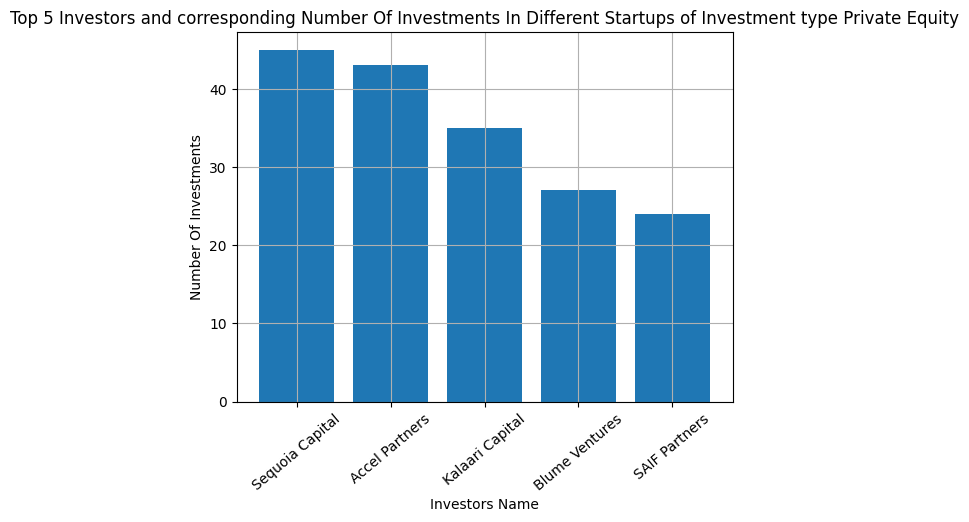

,Name Of Investors,Total Number Of Investments of type Private Equity
0,Sequoia Capital,45
1,Accel Partners,43
2,Kalaari Capital,35
3,Blume Ventures,27
4,SAIF Partners,24


In [18]:
#plot
plt.bar(x, y)
plt.grid()
plt.xlabel("Investors Name")
plt.ylabel("Number Of Investments")
plt.xticks(rotation=40)
plt.title("Top 5 Investors and corresponding Number Of Investments In Different Startups of Investment type Private Equity")
plt.show()

#pandas frame for Investors name and corresponding Number of Investments made by them in different startups and Investment type is either Seed funding or Crowd funding
li = list(zip(x,y))
investor_data = pd.DataFrame(li, columns = ["Name Of Investors", "Total Number Of Investments of type Private Equity"])
investor_data